In [4]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨토','선풍기','선풍기','믹서','믹서']
encoder=LabelEncoder()

In [7]:
encoder.fit(items)
labels=encoder.transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


In [8]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨토'], dtype='<U4')

In [9]:
encoder.inverse_transform(labels)

array(['TV', '냉장고', '전자렌지', '컴퓨토', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U4')

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items=['TV','냉장고','전자렌지','컴퓨토','선풍기','선풍기','믹서','믹서']
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
labels = labels.reshape(-1,1)

In [14]:
onh=OneHotEncoder()
onh.fit(labels)
onh_labels = onh.transform(labels)

In [20]:
print(onh_labels.toarray())
print(onh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [21]:
import pandas as pd
df = pd.DataFrame({'items':['TV','냉장고','전자렌지','컴퓨토','선풍기','선풍기','믹서','믹서']})

C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨토
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df =pd.DataFrame(data=iris_data,columns=iris.feature_names)

In [32]:
iris_df.var(), iris_df.mean()

(sepal length (cm)    0.685694
 sepal width (cm)     0.189979
 petal length (cm)    3.116278
 petal width (cm)     0.581006
 dtype: float64,
 sepal length (cm)    5.843333
 sepal width (cm)     3.057333
 petal length (cm)    3.758000
 petal width (cm)     1.199333
 dtype: float64)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [34]:
iris_df_sc= pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
iris_df_sc.mean(),iris_df_sc.var()

In [40]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(iris_df)
mm2 = mm.transform(iris_df)
iris_df_mm= pd.DataFrame(data=mm2,columns=iris.feature_names)
iris_df_mm.min(),iris_df_mm.max()

(sepal length (cm)    0.0
 sepal width (cm)     0.0
 petal length (cm)    0.0
 petal width (cm)     0.0
 dtype: float64,
 sepal length (cm)    1.0
 sepal width (cm)     1.0
 petal length (cm)    1.0
 petal width (cm)     1.0
 dtype: float64)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('./titanic/train.csv', encoding='utf8')

In [46]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
titanic.isna().sum()
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Cabin'].fillna('N',inplace=True)
titanic['Embarked'].fillna('N',inplace=True)

In [51]:
titanic.isnull().sum().sum()

0

In [54]:
titanic['Sex'].value_counts(), titanic['Cabin'].value_counts(), titanic['Embarked'].value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 N              687
 G6               4
 C23 C25 C27      4
 B96 B98          4
 C22 C26          3
               ... 
 E50              1
 C103             1
 A7               1
 C54              1
 E36              1
 Name: Cabin, Length: 148, dtype: int64,
 S    644
 C    168
 Q     77
 N      2
 Name: Embarked, dtype: int64)

In [55]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].value_counts()

In [58]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

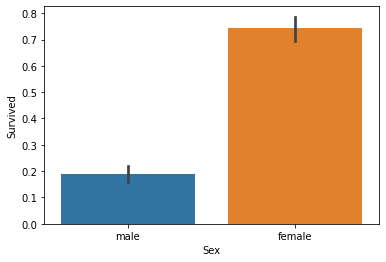

In [59]:
sns.barplot(x='Sex',y='Survived',data=titanic)

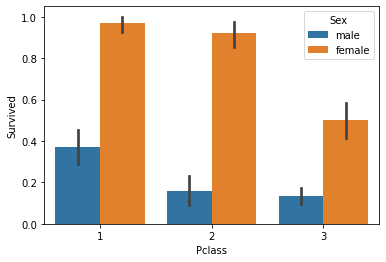

In [61]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic)

In [62]:
def get_category(age):
    cat = ''
    if age <=-1: cat ='Unknown'
    elif age<=5: cat ='Baby'
    elif age<=12: cat ='Child'
    elif age<=18: cat ='Teenager'
    elif age<=25: cat ='Student'
    elif age<=35: cat ='Young Adult'
    elif age<=60: cat ='Adult'
    else : cat='Elderly'
    
    return cat
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

<Figure size 720x432 with 0 Axes>

In [63]:
titanic['age_cat'] = titanic['Age'].apply(lambda x:get_category(x) )

NameError: name 'titi' is not defined

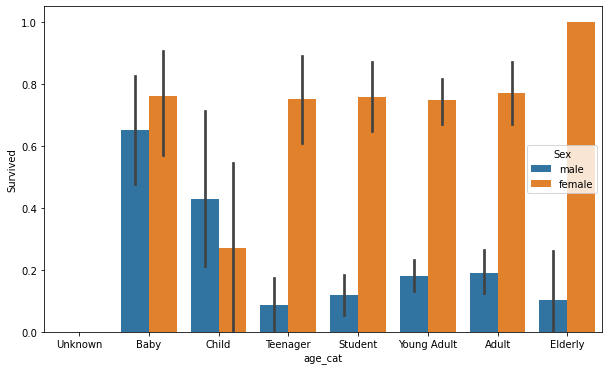

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_cat',y='Survived',hue='Sex',data=titanic,order=group_names)
titanic.drop('Age_cat',axis=1,inplace=True)

In [67]:
from sklearn import preprocessing
def encode_features(data):
    features =['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature]= le.transform(data[feature])
    return data

In [68]:
titanic_en = encode_features(titanic)

In [71]:
titanic_en.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult


In [72]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_feature(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] =df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df
def transform_feature(df):
    df = fillna(df)
    df=  drop_feature(df)
    df = format_features(df)
    return df

In [73]:
titanic = pd.read_csv('./titanic/train.csv', encoding='utf8')

In [74]:
y_titanic = titanic['Survived']
x_titanic = titanic.drop('Survived',axis=1)

In [75]:
x_titanic = transform_feature(x_titanic)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x_titanic,y_titanic,
                                                  test_size=0.2,random_state=11)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_cif =DecisionTreeClassifier(random_state=11)
rf_cif = RandomForestClassifier(random_state=11)
ir_cif=LogisticRegression()
# DD
df_cif.fit(X_train,y_train)
df_pred= df_cif.predict(X_test)
print('결정나무 정확도 ',accuracy_score(y_test,df_pred))
#RR
rf_cif.fit(X_train,y_train)
rf_pred= rf_cif.predict(X_test)
print('랜덤나무 정확도 ',accuracy_score(y_test,rf_pred))
#LL
ir_cif.fit(X_train,y_train)
if_pred= ir_cif.predict(X_test)
print('로지스틱 정확도 ',accuracy_score(y_test,if_pred))

결정나무 정확도  0.7877094972067039
랜덤나무 정확도  0.8547486033519553
로지스틱 정확도  0.8491620111731844


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_titanic)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = x_titanic.values[train_index], x_titanic.values[test_index]
        y_train, y_test = y_titanic.values[train_index], y_titanic.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(df_cif , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_cif, x_titanic , y_titanic , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [89]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(df_cif , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
